## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Classification predicts categories or labels, while regression predicts continuous values. For example, classification would predict labels like disease or no disease, while regression would predict things like price, temperature, sales, etc.
2. A confusion matrix is a table used to measure how well a classification model is performing. It compares the predictions made by the model with the actual results and shows where the model was right or wrong.
3. Accuracy is the proportion of correct classifications among all classifications and can be a poor measure because it hides class imbalance and doesn't reflect the different costs or types of errors the model makes.
4. Root mean squared error (RMSE) quantifies the average magnitude of prediction errors in a regression model.
5. Overfitting means that the model learns not just the underlying pattern, but also noise or random quirks in the training data. Underfitting means that the model is too simple and does not cover all real patterns in the data.
6. Splitting data into training and testing set allows you to choose the value of k based on how well it generalizes to unseen data, preventing overfitting to the training set and improving predictive performance.
7. A class label prediction is simple and easy to interpret, but it hides the model's uncertainty and doesn't allow you to adjust decision thresholds. Reporting a probability distritbution gives much richer information, showing how confident the model is and enabling flexible thresholding, but it is more complex to interpret and depends on the model producing well-calibrated probabilities.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/data/land_mines.csv")
df.head()


,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [15]:
# Summarizing the target label
df['mine_type'].value_counts()
df['mine_type'].value_counts(normalize=True)


,proportion
mine_type,
1,0.210059
2,0.207101
3,0.195266
4,0.195266
5,0.192308


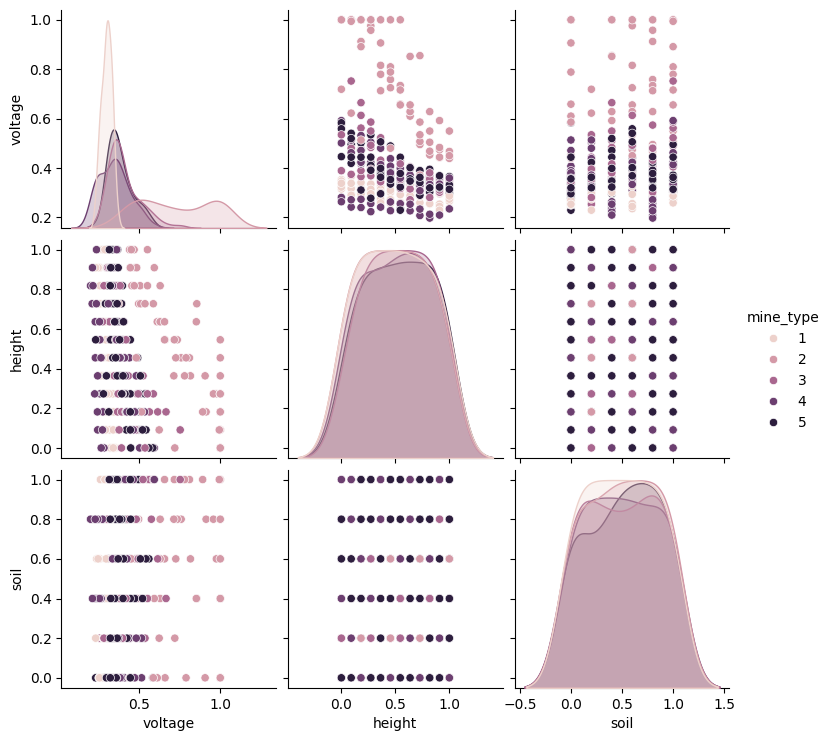

In [4]:
# Feature distributions
df[['voltage','height','soil']].describe()
sns.pairplot(df, hue="mine_type")
plt.show()

The target label mine_type is very evenly distributed across the five classes, with each type representing roughly 19–21% of the dataset. This balanced distribution means the classifier is not biased toward any single mine type, but it also suggests that no class has a clear majority signal to leverage. The pairplot shows that the three features (voltage, height, and soil) have substantial overlap across all mine types. Voltage exhibits some variation between classes, but its density curves still largely coincide, while height and soil have nearly identical distributions across mine types. The scatterplots further show extensive mixing of classes in every feature pair, with no distinct clusters or separable regions. Overall, these patterns indicate that the mines share very similar feature values, making it difficult for distance-based algorithms like k-NN to clearly distinguish between several mine types.

In [5]:
X = df[['voltage','height','soil']]
y = df['mine_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies.append((k, acc))

accuracies

[(1, 0.5088757396449705),
 (2, 0.47337278106508873),
 (3, 0.40828402366863903),
 (4, 0.41420118343195267),
 (5, 0.42011834319526625),
 (6, 0.41420118343195267),
 (7, 0.40236686390532544),
 (8, 0.41420118343195267),
 (9, 0.4319526627218935),
 (10, 0.4319526627218935),
 (11, 0.39644970414201186),
 (12, 0.40828402366863903),
 (13, 0.39644970414201186),
 (14, 0.3905325443786982),
 (15, 0.39644970414201186),
 (16, 0.40236686390532544),
 (17, 0.40236686390532544),
 (18, 0.39644970414201186),
 (19, 0.4260355029585799),
 (20, 0.39644970414201186)]

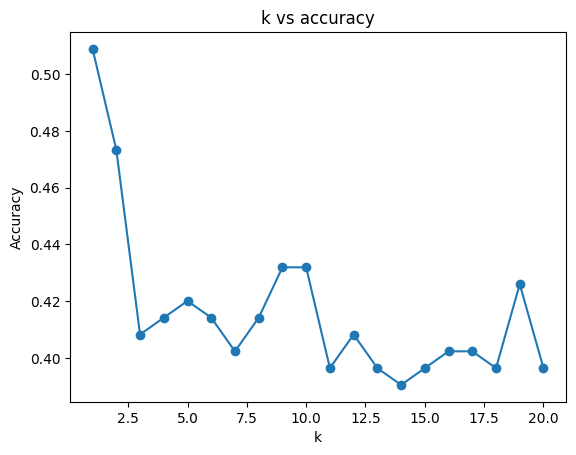

In [8]:
ks = [a[0] for a in accuracies]
accs = [a[1] for a in accuracies]

plt.plot(ks, accs, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs accuracy")
plt.show()

I selected the value of k by comparing test-set accuracy across values from 1 to 20. The accuracy was highest when k = 1, and all larger k values showed a noticeable drop in performance, suggesting that small k values fit the structure of this dataset better. Although k = 1 can be more sensitive to noise, it yielded the best generalization accuracy on the held-out test data and was therefore chosen for the final model.

In [13]:
# Confusion table for best model

from sklearn.metrics import confusion_matrix

best_k = 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, preds)
cm


array([[22,  0,  3,  3,  8],
       [ 0, 32,  0,  3,  0],
       [ 7,  0, 10,  9,  7],
       [ 6,  5,  4, 13,  5],
       [ 6,  0, 10,  7,  9]])

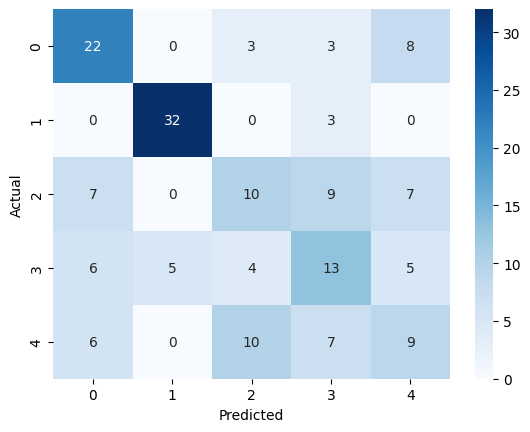

In [14]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix shows that the k-NN classifier performs very well for mine types 0 and especially 1, with 22 and 32 correct predictions respectively. However, the model struggles a lot with mine types 2, 3, and 4, which are frequently confused with one another. For example, type 2 is often misclassified as types 0, 3, or 4, and type 4 is heavily confused with type 2. This suggests that these three classes overlap significantly in feature space, reducing separability for a distance-based classifier like k-NN.

Because the model is accurate for some mine types but makes many mistakes on others, it should be used only as a decision-support tool. I would advise someone to use its predictions to flag likely mine types or highlight uncertain cases, but always confirming those predictions with expert judgment or additional testing.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [16]:
import pandas as pd

df = pd.read_csv("./data/USA_cars_datasets.csv")

# Keep only price, year, mileage
df = df[['price', 'year', 'mileage']]

df.head(), df.shape

(   price  year  mileage
 0   6300  2008   274117
 1   2899  2011   190552
 2   5350  2018    39590
 3  25000  2014    64146
 4  27700  2018     6654,
 (2499, 3))

In [17]:
df.isna().sum()

,0
price,0
year,0
mileage,0


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

In [21]:
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

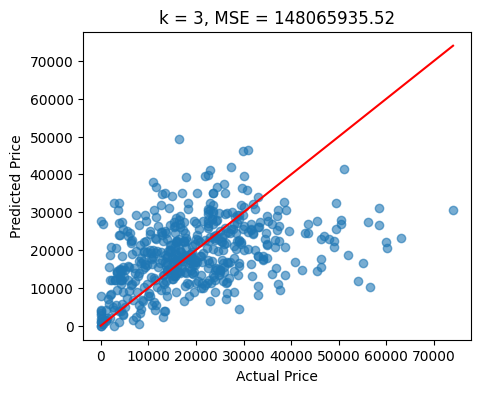

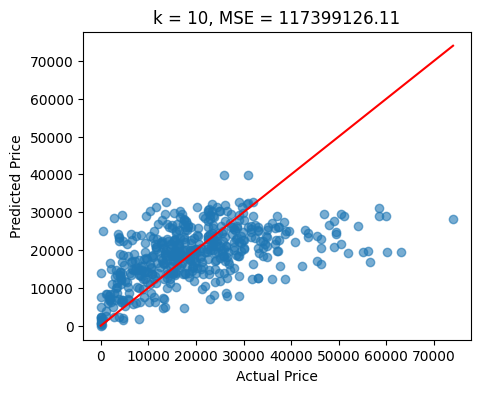

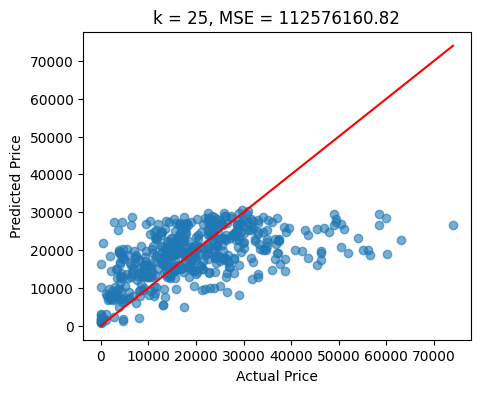

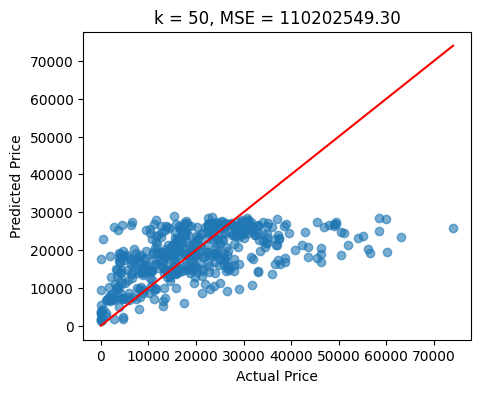

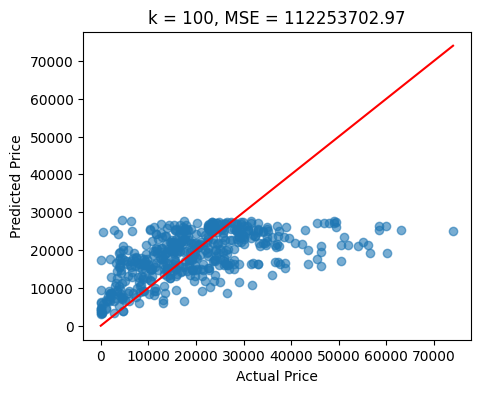

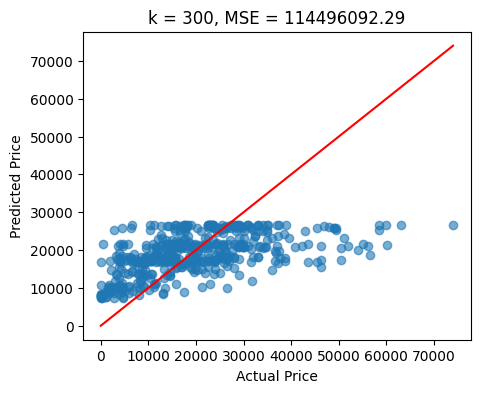

[(3, 148065935.51955554),
 (10, 117399126.10604002),
 (25, 112576160.82390079),
 (50, 110202549.3014296),
 (100, 112253702.9700672),
 (300, 114496092.28682345)]

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    mse_results.append((k, mse))

    # Scatterplot predicted vs actual
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, preds, alpha=0.6)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red')  # 45-degree line
    plt.show()

mse_results

As k increases, the k-NN regression predictions become smoother and the variance decreases.

According to the k-NN regression prediction, the optimal k is 50 because it produced the lowest MSE.

With very small k values, there is high variance and the model is sensitive to individual nearby points, causing the predicted-versus-actual plot to look noisy and scattered. This indicates overfitting. As k grows, the predictions begin to stabilize and follow the overall trend more consistently, reducing variance. When k becomes too large, the model becomes overly smooth and pulled toward the overall mean price. This indicates underfitting. Overall, the optimal k is the good in between where the MSE is minimized and avoids high-variance overfitting and high-bias underfitting.  

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)